# ML-NNet

This is a test of the ML-NNet package from [GitHub](https://github.com/randysimpson/ml-nnet).  We'll be setting up a few examples of how to use the microservice.  In these examples the microservice has already been started using the command `docker run -d -p 9000:9000 randysimpson/ml-nnet:latest`.

In [1]:
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas
import json

## Neural Network Example

This example will use a Neural Network with hidden layers of [10, 10].

In [2]:
#test
url = "http://localhost:9000/api/v1/setup"

data = {
    "xShape": 1,
    "hiddenLayers": [10, 10],
    "tShape": 1,
    "nnType": "nn"
}

r = requests.post(url, data = json.dumps(data))

Generate the data and train the model.

In [3]:
#now train.
url = "http://localhost:9000/api/v1/train"

np.random.seed(42)
    
X = np.arange(100).reshape((-1, 1))
T = np.sin(X * 0.04)

data = {
    "epochs": 2000,
    "method": "adam",
    "learningRate": 0.01,
    "x": X.tolist(),
    "t": T.tolist()
}

r = requests.post(url, data = json.dumps(data))

Wait for the model to train, this can take a while but for the data set we used in this example it is about 2 minutes or less.

In [7]:
#now use.
url = "http://localhost:9000/api/v1/use"

data = {
    "x": X.tolist()
}

r = requests.get(url, data = json.dumps(data))
data = r.json()

Let's take a look at the data after using the trained model:

In [8]:
print(data)

{'y': [[0.00819212656219842], [0.041373305287358664], [0.0771826251989225], [0.11517388742309231], [0.15477631951060938], [0.1953452067148786], [0.23622777555829472], [0.27683138716924205], [0.31667984267913774], [0.35544700021970854], [0.3929634456611604], [0.4291988647540544], [0.4642275857686739], [0.4981864879525939], [0.5312335520466409], [0.5635129559800521], [0.5951299438837583], [0.6261364236143919], [0.6565266174443065], [0.6862410623503584], [0.7151767006597559], [0.7432006073391231], [0.7701649969452673], [0.7959214888253758], [0.8203331195420548], [0.8432831903250451], [0.8646806272097252], [0.8844620266850438], [0.9025909059242265], [0.9190548590721411], [0.9338613586234189], [0.9470328731955243], [0.9586018453025497], [0.9686059249540717], [0.9770837156984169], [0.9840711755359651], [0.9895987321511589], [0.9936891192854789], [0.9963559138964536], [0.9976027453710861], [0.9974231514975576], [0.9958010644998305], [0.9927119181181171], [0.9881243679752932], [0.9820026074783

Now we want to see a plot of the trained data vs the target data we used to train the model

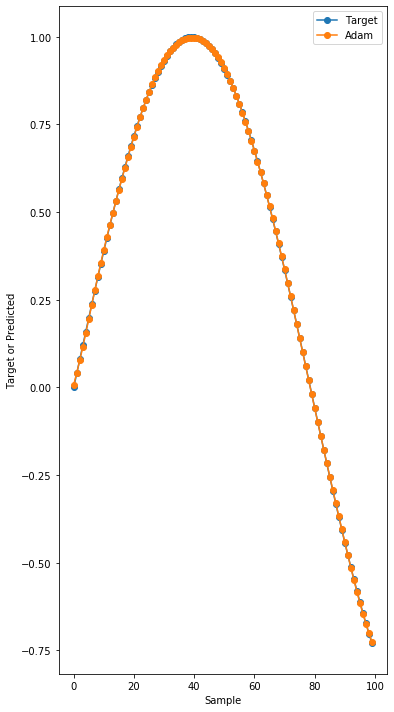

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.plot(T, 'o-', label='Target')
plt.plot(data["y"], 'o-', label='Adam')
plt.xlabel('Sample')
plt.ylabel('Target or Predicted')
plt.legend()

plt.tight_layout()